<a href="https://colab.research.google.com/github/keithferns98/OPTICALCHARACTERRECOGNISER/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 1.9 MB 35.7 MB/s 


In [3]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 9.0 kB/s 


In [4]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [7]:
IMAGE_PATH='sign.png'


In [8]:
reader=easyocr.Reader(['en'],gpu=False)
result=reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256296390029),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9683687979328574),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683973478739152)]

In [29]:
result[1][0][2]

[153, 219]

In [9]:
top_left=tuple(result[0][0][0])
bottom_right=tuple(result[0][0][2])
text=result[0][1]
font=cv2.FONT_HERSHEY_SIMPLEX

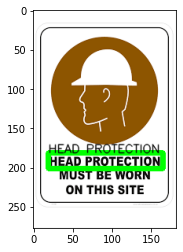

In [13]:
img=cv2.imread(IMAGE_PATH)
img=cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
img=cv2.putText(img,text,top_left,font,.5,(0,0,0),1,cv2.LINE_AA)
plt.imshow(img)
plt.show()

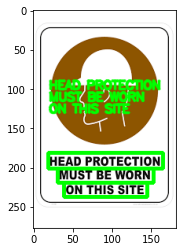

In [31]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()
